In [7]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [8]:
prompt19 = "Download the PDB for 2YXF. Tell me about its stability as found in the literature. Then, simulate it for 1 ns and plot its RMSD over time."
llm_var = "gpt-4o-2024-08-06"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-09-08
time: 16:35:09
LLM:  gpt-4o-2024-08-06 
Temperature:  0.1


In [9]:
agent.run(prompt19)

Thought: I will first download the PDB file for 2YXF. Then, I will search the literature for information about its stability. After that, I will set up a simulation for 1 ns and plot its RMSD over time.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "2YXF"
  }
}
```PDB file found with this ID: 2YXF
I will now search the literature for information about the stability of the protein with PDB ID 2YXF. 

Action:
```
{
  "action": "LiteratureSearch",
  "action_input": {
    "query": "2YXF protein stability"
  }
}
```"2YXF protein stability scholarly articles"
Search: "2YXF protein stability scholarly articles"

Found 1 papers
Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "2YXF_163511",
    "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1.0 * nanometers",
      "constraints": "HBonds",
      "rigidWater": true,
      "c

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [10]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-09-08
time: 18:34:08
Files found in registry: 2YXF_163511: PDB file downloaded from RSCB
 PDBFile ID: 2YXF_163511
 2YXF_163545: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_163551: Initial positions for simulation sim0_163551
 sim0_163551: Basic Simulation of Protein 2YXF_163545
 rec0_163552: Simulation trajectory for protein 2YXF_163545 and simulation sim0_163551
 rec1_163552: Simulation state log for protein 2YXF_163545 and simulation sim0_163551
 rec2_163552: Simulation pdb frames for protein 2YXF_163545 and simulation sim0_163551
 rmsd_163551: RMSD for 163551
 fig0_183406: RMSD plot for 163551


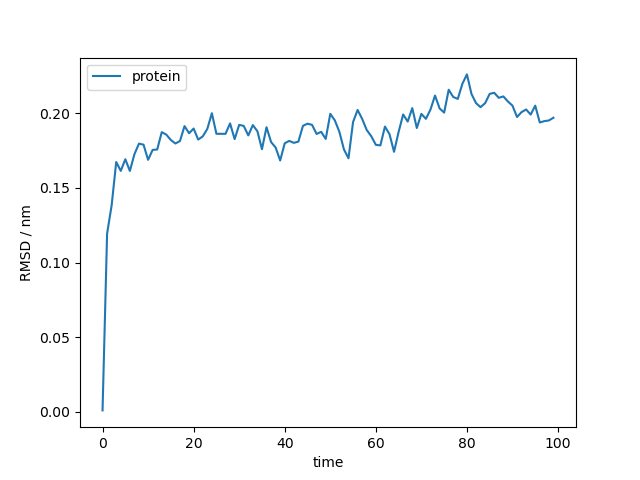

In [11]:
from IPython.display import Image
Image(filename=registry.get_mapped_path("fig0_183406"))

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### No hallucination ✅
### Logic make sense ✅
### Correct Answer  ✅
### Number of steps completed: 4
### % steps completed: 100%